## Kepler problem

In [1]:
import sympy
sympy.init_printing()

import numpy

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, './code')

from gauss_legendre import gauss_legendre
from evaluate_functional import evaluate_functional

In [2]:
# state vector (symbolic)
q_x = sympy.Symbol('q_x')
q_y = sympy.Symbol('q_y')
p_x = sympy.Symbol('p_x')
p_y = sympy.Symbol('p_y')
x = [q_x, q_y, p_x, p_y]

In [6]:
# physical parameters of Hamiltonian function
from sympy.abc import m, G
params = {
    # mass of the planet (kg)
    m: 4.0,
    
    # gravitational constant (m**3/s**2)
    G: 10.0
}

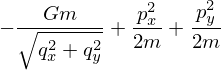

In [7]:
# Hamiltonian function
# (kinetic energy T + potential energy V)
T = sympy.Rational(1,2) * (p_x**2 / m + p_y**2 / m)
V = - G * m / sympy.sqrt(q_x**2 + q_y**2)
H = T + V
H

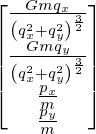

In [8]:
# efforts
e = sympy.Matrix([H.diff(co) for co in x])
e

In [9]:
# structure matrix
J = sympy.Matrix([[0, 0, 1, 0],
                  [0, 0, 0, 1],
                  [-1, 0, 0, 0],
                  [0, -1, 0, 0]])

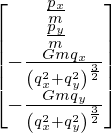

In [11]:
# time evolution
xdot = J @ e
xdot

### compute stationary orbit

$F_G \overset{!}{=} F_{\omega}$

$\frac{G \, m}{r^2} \overset{!}{=} m \, \omega^2 \, r$

$\omega = \frac{G}{r^3}$

In [12]:
r = 5.0
ω = numpy.sqrt(params[G]/r**3)

In [13]:
# initial condition
x_0 = numpy.array([0.0, r, params[m] * r * ω, 0.0])

# duration of simulation
t_f = 260.0

# time step
dt = 0.1

# order of collocation polynomial
s = 2

In [15]:
%time time, solution = gauss_legendre(x, xdot, x_0, t_f, dt, s, params=params)

CPU times: user 1.03 s, sys: 5.76 ms, total: 1.04 s
Wall time: 1.04 s


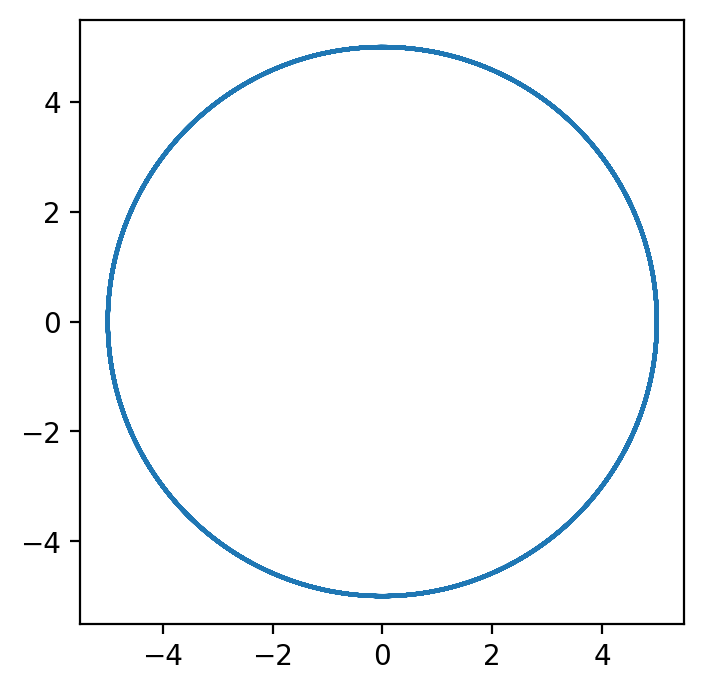

In [17]:
# plot trajectory (x-y-plane)
fig, ax = plt.subplots(dpi=200)
ax.set_aspect('equal')
ax.plot(solution[:, 0], solution[:, 1]);

In [18]:
# relative error of energy conservation
energy = evaluate_functional(x, H, solution, params=params)
abs(energy[0] - energy[-1]) / energy[0]